## Classification of Diffusion Model Generated Images using Classic Machine Learning Models

### Load necessary modules

In [1]:
# Load all necessary modules
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###  Load and transform all datasets 

In [2]:
# Load all datasets in numpy array format 
def removeTmpFiles(path):
    # automatically remove all .DS_Store files
    if path.split("/")[-1] == '.DS_Store': os.remove(path)
    elif os.path.isdir(path):
        for filename in os.listdir(path): removeTmpFiles(path + "/" + filename)

data_dir = "data/final_output_data/"
data_train, data_val, data_test = [], [], []
labels_train, labels_val, labels_test = [], [], []

data = {'train': data_train,
        'val': data_val,
        'test': data_test}
labels = {'train': labels_train,
          'val': labels_val,
          'test': labels_test}

dataset_types = ['train', 'val', 'test']
for t in dataset_types:
    curr_data_dir = data_dir+t
    removeTmpFiles(curr_data_dir) # for macOS
    for folder_name in os.listdir(curr_data_dir):
        folder_path_class = os.path.join(curr_data_dir, folder_name)
        label = folder_name
        for image_path in os.listdir(folder_path_class):
            image_path_full = os.path.join(folder_path_class, image_path)
            image = cv2.imread(image_path_full)
            image = cv2.resize(image, (240, 240))
            image = image.flatten()
            data[t].append(image)
            labels[t].append(label)
    data[t] = np.array(data[t], dtype=object)
    labels[t] = np.array(labels[t], dtype=object)

### Model 1: Support Vector Machine

In [3]:
def test_SVC_model(kernel, C_val, X_train, y_train, X_test):
    model = SVC(kernel=kernel, C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [4]:
y_pred_SVM = test_SVC_model('rbf', 10, data['train'], labels['train'], data['test'])
print("Classfication report for SVM:")
print(classification_report(labels['test'], y_pred_SVM, target_names=['artificial', 'human']))

Classfication report for SVM:
              precision    recall  f1-score   support

  artificial       0.64      0.94      0.76        51
       human       0.89      0.48      0.62        52

    accuracy                           0.71       103
   macro avg       0.77      0.71      0.69       103
weighted avg       0.77      0.71      0.69       103



Confusion matrix for SVM:


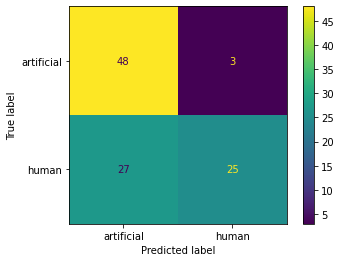

In [5]:
conf_mat = confusion_matrix(labels['test'], y_pred_SVM)
print("Confusion matrix for SVM:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

### Model 2: K-nearest-neighbor

In [6]:
def KNN(X_train, y_train, X_test):
    knn_model = KNeighborsClassifier(n_neighbors=4)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

In [7]:
y_pred_KNN = KNN(data['train'], labels['train'], data['test'])
print("Classfication report for k-nearest-neighbors:")
print(classification_report(labels['test'], y_pred_KNN, target_names=['artificial', 'human']))

Classfication report for k-nearest-neighbors:
              precision    recall  f1-score   support

  artificial       0.75      0.53      0.62        51
       human       0.64      0.83      0.72        52

    accuracy                           0.68       103
   macro avg       0.70      0.68      0.67       103
weighted avg       0.70      0.68      0.67       103



Confusion matrix for k-nearest-neighbors:


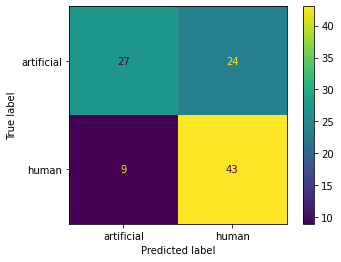

In [8]:
conf_mat = confusion_matrix(labels['test'], y_pred_KNN)
print("Confusion matrix for k-nearest-neighbors:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

### Decision Tree

In [9]:
def tree_model(X_train, y_train, X_test):
    dtree_model = DecisionTreeClassifier(random_state=540)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_test)
    return y_pred 

In [10]:
y_pred_decision_tree = tree_model(data['train'], labels['train'], data['test'])
print("Classfication report for decision tree model:")
print(classification_report(labels['test'], y_pred_decision_tree, target_names=['artificial', 'human']))

Classfication report for decision tree model:
              precision    recall  f1-score   support

  artificial       0.59      0.84      0.69        51
       human       0.73      0.42      0.54        52

    accuracy                           0.63       103
   macro avg       0.66      0.63      0.62       103
weighted avg       0.66      0.63      0.61       103



Confusion matrix for decision tree model:


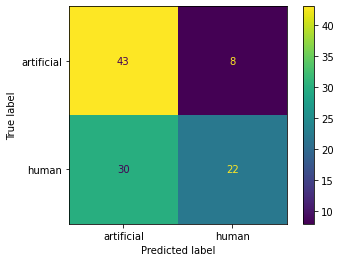

In [11]:
conf_mat = confusion_matrix(labels['test'], y_pred_decision_tree)
print("Confusion matrix for decision tree model:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()

### Random Forest

In [12]:
def random_forest_model(X_train, y_train, X_test):    
    rf = RandomForestClassifier(min_samples_leaf=10, max_features=10, random_state=540)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    return y_pred

In [13]:
y_pred_random_forest = random_forest_model(data['train'], labels['train'], data['test'])
print("Classfication report for random forest model:")
print(classification_report(labels['test'], y_pred_random_forest, target_names=['artificial', 'human']))

Classfication report for random forest model:
              precision    recall  f1-score   support

  artificial       0.72      0.94      0.81        51
       human       0.92      0.63      0.75        52

    accuracy                           0.79       103
   macro avg       0.82      0.79      0.78       103
weighted avg       0.82      0.79      0.78       103



Confusion matrix for random forest model:


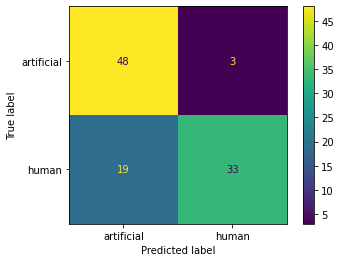

In [14]:
conf_mat = confusion_matrix(labels['test'], y_pred_random_forest)
print("Confusion matrix for random forest model:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['artificial', 'human'])
disp.plot()
plt.show()